# Generating the date-set

In [20]:
import datetime
import pandas as pd
import numpy as np 

In [21]:
start_date = datetime.date(2019, 1, 1)
end_date = datetime.date(2019, 4, 1)

dates = [
    start_date + datetime.timedelta(n) for n in range(int((end_date - start_date).days))]


In [22]:

date_standard = [0]*(len(dates))
for i in range(0, (len(dates))):
    date_standard[i] = datetime.date.strftime(dates[i], '%d-%m-%Y')


# Importing the tweets 

In [23]:
df = pd.read_csv( r'C:\Users\xdead\Desktop\Ic\CONGRESSO UNIVAP\tweets_jan_mar.csv')


In [24]:
#adjusting the time UTC to BR-SP 
df.date=pd.to_datetime(df.date)
df['date'] = df['date'].dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')

In [25]:
df['Time'] = df['date'].dt.strftime('%H:%M')
df['Date'] = df['date'].dt.strftime('%Y-%m-%d')


# Filtering tweets by list of words 

In [26]:
meteo_hidro = ['chuva', 'rain', 'temporal', 'lightning', 'tempestade', 'nublado', 'trovão',
               'rainbow', 'precipitação', 'alagado', 'alagamento', 'enchente', 'enxente', 'inundação', 'raio']
tweets_filtered=df[df.text.str.contains('\W|\W'.join(meteo_hidro), case=False, regex=True)]

In [27]:
tweets_filtered.head(3)

,Unnamed: 0,date,text,Time,Date
100,100,2019-01-01 19:33:49-02:00,35’ de natação antes da chuva... \n#personaltr...,19:33,2019-01-01
214,214,2019-01-01 16:58:21-02:00,'O que dizer da chuva... já que todas às palav...,16:58,2019-01-01
507,507,2019-01-01 10:25:28-02:00,Que a chuva da paz esperança felicidade e am...,10:25,2019-01-01


In [28]:
#generating the frequency of tweets in each day 
tweets_frequence=tweets_filtered.Date.value_counts().reset_index().sort_values(by='index')


In [29]:
tweets_frequence.columns=(["date", 'Frequence'])

In [30]:
import numpy as np 

# Data Regulation to tweets 
This step consist of filling the gap dates with zeros, to contain the entire temporal series 

In [31]:
complete_date=pd.DataFrame(date_standard)
frames = [complete_date, tweets_frequence]


In [75]:
tweets_frequence.index = range(len(tweets_frequence.index))
complete_date.columns=['date']
complete_date.date = pd.to_datetime(complete_date.date).dt.strftime("%d-%m-%Y")
tweets_frequence.date=pd.to_datetime(tweets_frequence.date).dt.strftime("%d-%m-%Y")



In [80]:
tweets_frequence.date.unique()

array(['01-01-2019', '02-01-2019', '03-01-2019', '04-01-2019',
       '05-01-2019', '06-01-2019', '07-01-2019', '08-01-2019',
       '09-01-2019', '10-01-2019', '11-01-2019', '12-01-2019',
       '14-01-2019', '15-01-2019', '16-01-2019', '17-01-2019',
       '18-01-2019', '19-01-2019', '20-01-2019', '21-01-2019',
       '22-01-2019', '23-01-2019', '24-01-2019', '25-01-2019',
       '26-01-2019', '27-01-2019', '28-01-2019', '29-01-2019',
       '30-01-2019', '31-01-2019', '01-02-2019', '03-02-2019',
       '04-02-2019', '05-02-2019', '06-02-2019', '07-02-2019',
       '09-02-2019', '11-02-2019', '12-02-2019', '13-02-2019',
       '14-02-2019', '15-02-2019', '16-02-2019', '17-02-2019',
       '18-02-2019', '19-02-2019', '20-02-2019', '21-02-2019',
       '22-02-2019', '23-02-2019', '24-02-2019', '25-02-2019',
       '26-02-2019', '27-02-2019', '28-02-2019', '01-03-2019',
       '02-03-2019', '03-03-2019', '04-03-2019', '05-03-2019',
       '06-03-2019', '07-03-2019', '08-03-2019', '09-03

In [81]:
regularized_data=tweets_frequence.merge(complete_date, how='left')
regularized_data=regularized_data.fillna(0)


In [82]:
regularized_data.date.unique()

array(['01-01-2019', '02-01-2019', '03-01-2019', '04-01-2019',
       '05-01-2019', '06-01-2019', '07-01-2019', '08-01-2019',
       '09-01-2019', '10-01-2019', '11-01-2019', '12-01-2019',
       '14-01-2019', '15-01-2019', '16-01-2019', '17-01-2019',
       '18-01-2019', '19-01-2019', '20-01-2019', '21-01-2019',
       '22-01-2019', '23-01-2019', '24-01-2019', '25-01-2019',
       '26-01-2019', '27-01-2019', '28-01-2019', '29-01-2019',
       '30-01-2019', '31-01-2019', '01-02-2019', '03-02-2019',
       '04-02-2019', '05-02-2019', '06-02-2019', '07-02-2019',
       '09-02-2019', '11-02-2019', '12-02-2019', '13-02-2019',
       '14-02-2019', '15-02-2019', '16-02-2019', '17-02-2019',
       '18-02-2019', '19-02-2019', '20-02-2019', '21-02-2019',
       '22-02-2019', '23-02-2019', '24-02-2019', '25-02-2019',
       '26-02-2019', '27-02-2019', '28-02-2019', '01-03-2019',
       '02-03-2019', '03-03-2019', '04-03-2019', '05-03-2019',
       '06-03-2019', '07-03-2019', '08-03-2019', '09-03

# Plots

In [83]:
import matplotlib.pyplot as plt

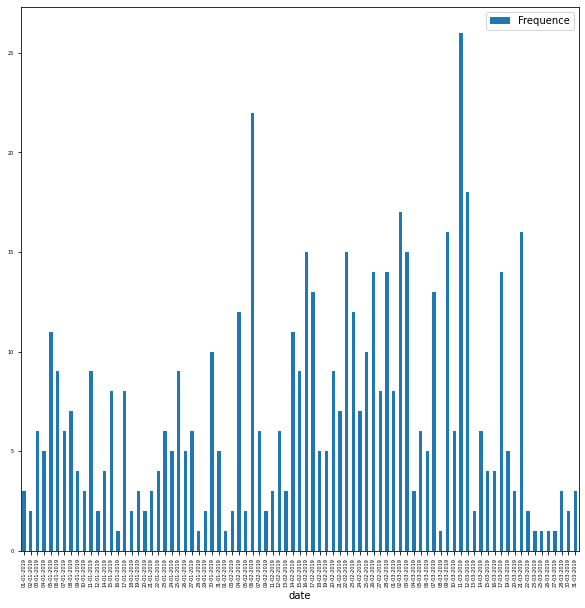

In [84]:
ax=regularized_data.plot.bar(x='date', figsize=(10,10))
ax.tick_params(axis='x', rotation=90)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=5)
ax.tick_params(axis='both', which='minor', labelsize=5)


In [111]:
tweets_filtered[tweets_filtered.Date=='2019-03-11']

,Unnamed: 0,date,text,Time,Date
60796,60796,2019-03-11 20:40:22-03:00,#Madamemanstyle#sampacity #prettosoficial@lecc...,20:40,2019-03-11
60869,60869,2019-03-11 19:12:42-03:00,🔴 LINK NOS STORIES.\nWee Gee - In The Rain\n#B...,19:12,2019-03-11
60903,60903,2019-03-11 18:33:26-03:00,dia caótico sampa/ #temporal #sampa #brasil em...,18:33,2019-03-11
60959,60959,2019-03-11 17:30:37-03:00,Boa tarde galera. E em Sao Paulo a chuva caus...,17:30,2019-03-11
60961,60961,2019-03-11 17:26:51-03:00,🙏\nDiante do Caos... MEDITE!\n🙏✨❤️\nSim ela m...,17:26,2019-03-11
60980,60980,2019-03-11 17:08:18-03:00,#breakingnews🚨 12 dead and 6 injured joao dori...,17:08,2019-03-11
61059,61059,2019-03-11 15:32:29-03:00,E seguimos alegres tirando onda nesse que é o ...,15:32,2019-03-11
61067,61067,2019-03-11 15:25:42-03:00,... Já passei por tantas tempestades que até p...,15:25,2019-03-11
61155,61155,2019-03-11 13:23:11-03:00,#SAÚDE #PÚBLICA PREJUDICADA COM A FORTE CHUV...,13:23,2019-03-11
61227,61227,2019-03-11 12:09:19-03:00,A semana começou tensa aqui em SP. Muita chuva...,12:09,2019-03-11


# Importing the radar data 

In [39]:
radar = pd.read_csv(r'C:\Users\xdead\Desktop\Ic\CONGRESSO UNIVAP\cappi_01012019_31032019_diario_mm.csv')
radar.head(2)

,date,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25
0,2019-01-01,3.173042,3.226428,4.195124,3.648779,4.265342,5.528599,4.249552,3.934576,6.090778,...,5.142183,2.907812,5.841916,3.983348,6.38728,5.346278,4.68607,6.47143,6.455297,4.995254
1,2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000


In [42]:
radar_857A=radar[['date', 'p2']]

In [55]:
radar_857A=radar_857A.copy()
radar_857A.date=pd.to_datetime(radar_857A.date).dt.strftime('%d-%m-%Y')

In [57]:
radar_857A.date.unique()

array(['01-01-2019', '02-01-2019', '03-01-2019', '04-01-2019',
       '05-01-2019', '06-01-2019', '07-01-2019', '08-01-2019',
       '09-01-2019', '10-01-2019', '11-01-2019', '12-01-2019',
       '13-01-2019', '14-01-2019', '15-01-2019', '16-01-2019',
       '17-01-2019', '18-01-2019', '19-01-2019', '20-01-2019',
       '21-01-2019', '22-01-2019', '23-01-2019', '24-01-2019',
       '25-01-2019', '26-01-2019', '27-01-2019', '28-01-2019',
       '29-01-2019', '30-01-2019', '31-01-2019', '01-02-2019',
       '02-02-2019', '03-02-2019', '04-02-2019', '05-02-2019',
       '06-02-2019', '07-02-2019', '08-02-2019', '09-02-2019',
       '10-02-2019', '11-02-2019', '12-02-2019', '13-02-2019',
       '14-02-2019', '15-02-2019', '16-02-2019', '17-02-2019',
       '18-02-2019', '19-02-2019', '20-02-2019', '21-02-2019',
       '22-02-2019', '23-02-2019', '24-02-2019', '25-02-2019',
       '26-02-2019', '27-02-2019', '28-02-2019', '01-03-2019',
       '02-03-2019', '03-03-2019', '04-03-2019', '05-03

In [91]:
radar_tweet=regularized_data.merge(radar_857A, how='inner')


In [100]:
radar_tweet[radar_tweet.Frequence==max(radar_tweet.Frequence)]

,date,Frequence,p2
65,11-03-2019,26,0.0


# Exploratory Analysis 

In [96]:
import plotly.express as px

In [122]:
grap = px.treemap(radar_tweet, path=['p2', 'date', 'Frequence'])
grap.show()
#the majority of dates that 


In [120]:
graph=px.scatter_matrix(radar_tweet, dimensions=["p2", 'Frequence'], color='Frequence')
graph.show()

In [133]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=radar_tweet.date, y=radar_tweet.Frequence, name="Tweet frequence"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=radar_tweet.date, y=radar_tweet.p2, name="Radar"),
    secondary_y=True,
)
fig.update_layout(
    title_text="Tweets frequency and Radar in temporal series"
)
fig.update_yaxes(title_text="<b>Tweets frequence</b> yaxis", secondary_y=False)
fig.update_yaxes(title_text="<b>Radar</b> yaxis", secondary_y=True)

fig.show()


# Statistical manipulation

## Pearson correlation 

In [134]:
from scipy import stats

In [138]:
r, pvalue=stats.pearsonr(radar_tweet.Frequence.array, radar_tweet.p2.array)


In [143]:
print('Valor de R, pela correlação de Pearson:', r, '\n P-valor:', pvalue )

Valor de R, pela correlação de Pearson: 0.22762528972342108 
 P-valor: 0.03849288888296602


## Spearman

In [144]:
r, pvalue = stats.spearmanr(radar_tweet.Frequence.array, radar_tweet.p2.array)


In [145]:
print('Valor de R, pela correlação de Spearman:', r, '\n P-valor:', pvalue)


Valor de R, pela correlação de Spearman: 0.39404726662115314 
 P-valor: 0.00022797765835817242


## KendallTau

In [146]:
r, pvalue = stats.kendalltau(radar_tweet.Frequence.array, radar_tweet.p2.array)


In [150]:
print('Valor de R, pela correlação de Kendalls tau:', r, '\n P-valor:', pvalue)


Valor de R, pela correlação de Kendalls tau: 0.29979677986084935 
 P-valor: 0.00029747462616516685
